<a href="https://colab.research.google.com/github/ML-HW-SYS/a1-ethanglaser/blob/main/hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name
Year
Type
peak FLOPs
peak memory bandwidth
computation explanation
source

NVIDIA GeForce 256 SDR
1999
GPU
50 GFLOPs
2.656 GB/s
...
http://vgamuseum.info/images/doc/nvidia/gf256/geforce256_graphics.pdf, https://en.wikipedia.org/wiki/List_of_Nvidia_graphics_processing_units#cite_note-9

NVIDIA TITAN Xp
2017
GPU
11366.4 GFLOPs
547.7 GB/s
...
https://en.wikipedia.org/wiki/List_of_Nvidia_graphics_processing_units#cite_note-9

NVIDIA TESLA K80 (from colab)
2014
GPU
4.113 TFLOPs
240.6 GB/s
...
https://www.techpowerup.com/gpu-specs/tesla-k80.c2616

Intel i7 920
2008
CPU
63 GFLOPs
25.6 GB/s
...
https://www.intel.com/content/www/us/en/products/sku/37147/intel-core-i7920-processor-8m-cache-2-66-ghz-4-80-gts-intel-qpi/specifications.html

AMD Ryzen 9 3900X
2019
CPU
2649.6 GFLOPs
47.68 GB/s
...
https://www.techpowerup.com/cpu-specs/ryzen-9-3900x.c2128

AMD Radeon RX 6800
2019
GPU
18688 GFLOPS
512 GB/s
...
https://en.wikipedia.org/wiki/List_of_AMD_graphics_processing_units

Apple A14
2020
SoC
1000 GFLOPs
42.7 GB/s
...
https://www.cpu-monkey.com/en/igpu-apple_a14-180

Apple M1 Max
2020
SoC
2.7 TFLOPs
330 GB/s
...
https://tlkh.dev/benchmarking-the-apple-m1-max#heading-memory

TPU v3
2018
ASIC
420 TFLOPs
1 TB/s
...
https://cloud.google.com/tpu

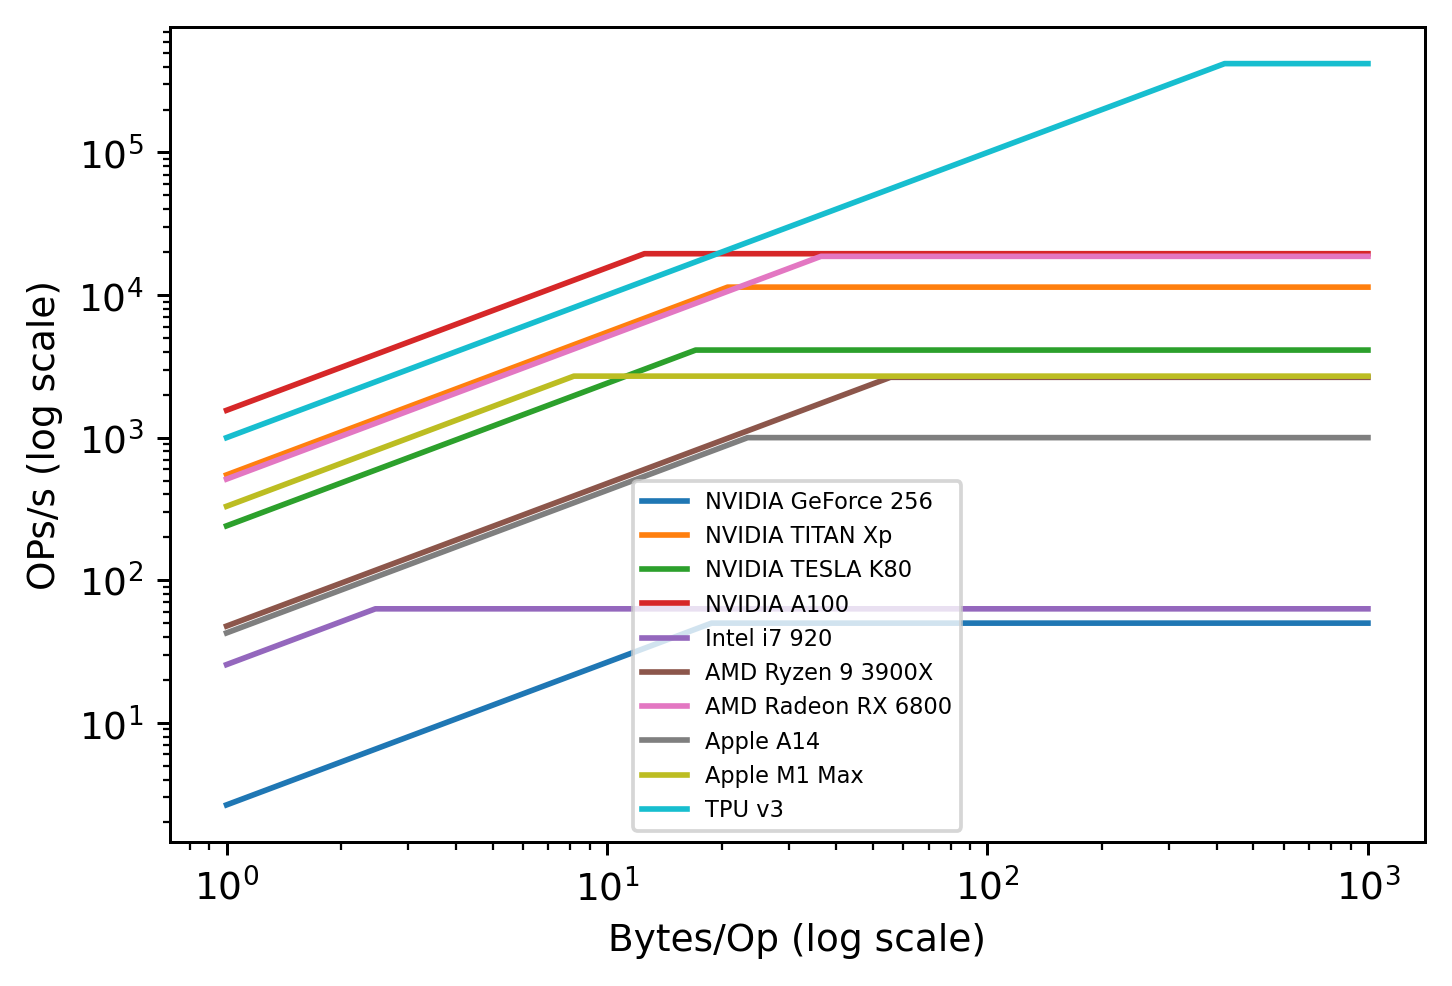

In [1]:
#Q1
import matplotlib.pyplot as plt
import numpy as np

def roofline(input_dictionary, input2_dictionary={}, performance_dictionary={}, legend_size=6):
    plt.figure(dpi=270)
    for device in input_dictionary.keys():
        x = np.linspace(1, 1000)
        current_gf = input_dictionary[device]['GF']
        current_mb = input_dictionary[device]['MB']
        meeting = current_gf / current_mb
        y = np.array([current_mb * current_x if current_x < meeting else current_gf for current_x in x ])
        #plt.plot(x, y, label=device)
        plt.plot([1, current_gf / current_mb, 1000], [current_mb, current_gf, current_gf], label=device)
        if device == 'NVIDIA TESLA K80' and len(input2_dictionary.keys()):
            for model in input2_dictionary.keys():
                oi = input2_dictionary[model]['oi']
                if len(performance_dictionary.keys()):
                    y_vals =  [current_mb * oi if oi < meeting else current_gf]
                    for batch in [1, 64, 256]:
                        if 'batch_' + str(batch) + '_time' in performance_dictionary[model]['cpu'].keys():
                            y_vals.append(performance_dictionary[model]['GF'] / performance_dictionary[model]['gpu']['batch_' + str(batch) + '_time'])
                    plt.scatter([oi] * len(y_vals), y_vals, marker="*", label=model)
                else:
                    plt.scatter([oi], [current_mb * oi if oi < meeting else current_gf], marker="*", label=model)
        if device == 'Intel i7 920' and len(input2_dictionary.keys()):
            for model in input2_dictionary.keys():
                oi = input2_dictionary[model]['oi']
                if len(performance_dictionary.keys()):
                    y_vals =  [current_mb * oi if oi < meeting else current_gf]
                    for batch in [1, 64, 256]:
                        if 'batch_' + str(batch) + '_time' in performance_dictionary[model]['cpu'].keys():
                            y_vals.append(performance_dictionary[model]['GF'] / performance_dictionary[model]['cpu']['batch_' + str(batch) + '_time'])
                    plt.scatter([oi] * len(y_vals), y_vals, marker="P", label=model)
                else:
                    plt.scatter([oi], [current_mb * oi if oi < meeting else current_gf], marker="P", label=model)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Bytes/Op (log scale)')
    plt.ylabel('OPs/s (log scale)')
    plt.legend(loc=0, prop={'size': legend_size})
    plt.show()


dict1 = {'NVIDIA GeForce 256': {'GF': 50, 'MB': 2.656}, 
         'NVIDIA TITAN Xp': {'MB': 547.7, 'GF': 11366.4},
         'NVIDIA TESLA K80': {'GF': 4113, 'MB': 240.6},
         'NVIDIA A100': {'GF': 19500, 'MB': 1555},
         'Intel i7 920': {'GF': 63, 'MB': 25.6},
         'AMD Ryzen 9 3900X': {'GF': 2649.6, 'MB': 47.68},
         'AMD Radeon RX 6800': {'GF': 18688, 'MB': 512},
         'Apple A14': {'GF': 1000, 'MB': 42.7},
         'Apple M1 Max': {'GF': 2700, 'MB': 330},
         'TPU v3': {'GF': 420000, 'MB': 1000}
         }
roofline(dict1)

In [2]:
# Question 2
from torchvision import models
from torchaudio import models as tamodels
import torch

#dir(models)


In [3]:
# https://learnopencv.com/pytorch-for-beginners-image-classification-using-pre-trained-models/
alexnet = models.alexnet(pretrained=True)


from torchvision import transforms
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225]
 )])
!pip install thop
from PIL import Image
import numpy as np
from thop import profile
# img = Image.open("dog.jpg")
img = Image.fromarray(np.random.randint(256, size=(265,265,3)).astype(np.uint8))
img_t = transform(img)
batch_t = torch.unsqueeze(img_t, 0).to(torch.device('cpu'))
print(batch_t.shape)

alexnet.eval()
# out = alexnet(batch_t)
# print(out)
print('hello')

from thop import profile
from torchsummary import summary
input = torch.randn(1, 3, 224, 224)
macs, params = profile(alexnet, inputs=(input, ), verbose=False)

model = alexnet.to(torch.device('cpu'))
summary(model, (3, 224, 224))
# print(a)

print(2 * macs / 10 ** 9, "GFLOPs")
print(params, "params")


Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

torch.Size([1, 3, 224, 224])
hello


/usr/local/lib/python3.7/dist-packages/thop/vision/basic_hooks.py:92: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  kernel = torch.DoubleTensor([*(x[0].shape[2:])]) // torch.DoubleTensor(list((m.output_size,))).squeeze()


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 55, 55]          23,296
              ReLU-2           [-1, 64, 55, 55]               0
         MaxPool2d-3           [-1, 64, 27, 27]               0
            Conv2d-4          [-1, 192, 27, 27]         307,392
              ReLU-5          [-1, 192, 27, 27]               0
         MaxPool2d-6          [-1, 192, 13, 13]               0
            Conv2d-7          [-1, 384, 13, 13]         663,936
              ReLU-8          [-1, 384, 13, 13]               0
            Conv2d-9          [-1, 256, 13, 13]         884,992
             ReLU-10          [-1, 256, 13, 13]               0
           Conv2d-11          [-1, 256, 13, 13]         590,080
             ReLU-12          [-1, 256, 13, 13]               0
        MaxPool2d-13            [-1, 256, 6, 6]               0
AdaptiveAvgPool2d-14            [-1, 25

Model
FLOPs (MACs * 2?)
Memory footprint (Estimated Total Size?)

ResNet50
8.22 GFLOPs
384.62 MB

AlexNet
1.43 GFLOPs
242.03 MB

MobileNet v3 large
0.45 GFLOPs
126.9 MB

VGG19
39.29 GFLOPs
787.31

SqueezeNet1_0
1.65 GFLOPs
97.14 MB

EfficientNetb7
10.53 GFLOPs
1.33 GB

GoogleNet
3.01 GFLOPs
119.95 MB

ShuffleNet
0.09 GFLOPs
30.85 MB

WideResNet101_2
45.59 GFLOPs
1.03 GB

Inception v3
5.69 GFLOPs
209.48 MB

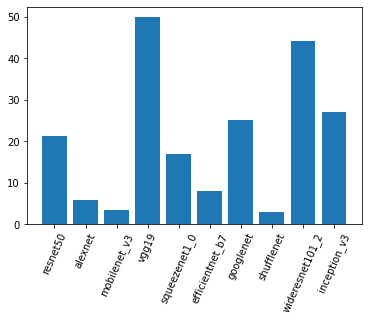

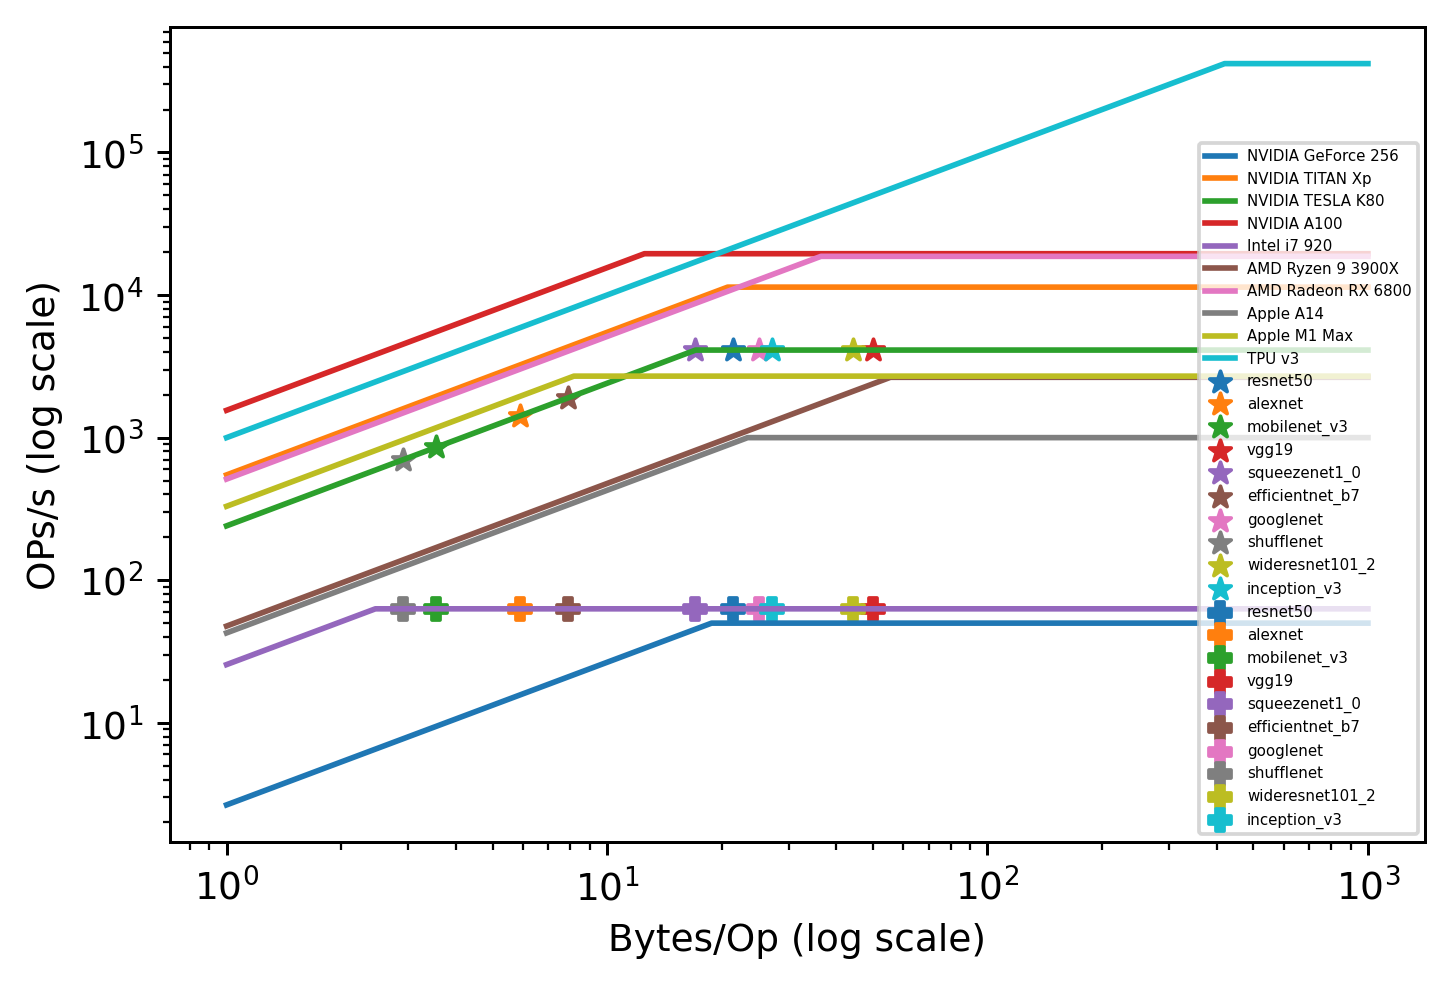

In [4]:
# Q2
def add_to_roofline(input_dict):
    for model in input_dict.keys():
        op_intensity = input_dict[model]['GF'] / input_dict[model]['MF'] * 1000
        input_dict[model]['oi'] = op_intensity
    plt.bar(input_dict.keys(), [input_dict[i]['oi'] for i in input_dict.keys()])
    plt.xticks(rotation = 66)
    plt.show()
    return input_dict



dict2 = {
    'resnet50': {'GF': 8.22, 'MF': 384.62},
    'alexnet': {'GF': 1.43, 'MF': 242.03},
    'mobilenet_v3': {'GF': 0.45, 'MF': 126.9},
    'vgg19': {'GF': 39.29, 'MF': 787.31},
    'squeezenet1_0': {'GF': 1.65, 'MF': 97.14},
    'efficientnet_b7': {'GF': 10.53, 'MF': 1330},
    'googlenet': {'GF': 3.01, 'MF': 119.950},
    'shufflenet': {'GF': 0.09, 'MF': 30.85},
    'wideresnet101_2': {'GF': 45.59, 'MF': 1030},
    'inception_v3': {'GF': 5.69, 'MF': 209.48}
}
dict2 = add_to_roofline(dict2)
roofline(dict1, input2_dictionary = dict2, legend_size=4)

In [12]:
!nvidia-smi

Sun Feb 20 19:56:49 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P0    27W /  70W |  14062MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [18]:
# Helper code for Q3 to get latency of various batch sizes for models
import numpy as np

# from torchvision import transforms
# transform = transforms.Compose([
#     transforms.Resize(256),
#     transforms.CenterCrop(224),
#     transforms.ToTensor(),
#     transforms.Normalize(
#     mean=[0.485, 0.456, 0.406],
#     std=[0.229, 0.224, 0.225]
#  )])
# !pip install thop
# from PIL import Image
# import numpy as np
# from thop import profile
# img = Image.open("dog.jpg")
# img = Image.fromarray(.astype(np.uint8))
# img_t = transform(img)
# batch_t = torch.unsqueeze(img_t, 0)
from torchvision import models
from thop import profile
import torch
import time
#(models.wide_resnet101_2(pretrained=True), 'wideresnet101_2'), (models.inception_v3(pretrained=True), 'inception_v3'),(models.shufflenet_v2_x0_5(pretrained=True), 'shufflenet'), (models.efficientnet_b7(pretrained=True),'efficientnet_b7'),(models.googlenet(pretrained=True),'googlenet'),  (models.vgg19(pretrained=True),'vgg19')
#(models.resnet50(pretrained=True),'resnet50'), (models.alexnet(pretrained=True), 'alexnet'),(models.mobilenet_v3_large(pretrained=True),'mobilenet_v3'),(models.squeezenet1_0(pretrained=True),'squeezenet1_0'),
for model, model_name in [(models.resnet50(pretrained=True),'resnet50'), (models.alexnet(pretrained=True), 'alexnet'),(models.mobilenet_v3_large(pretrained=True),'mobilenet_v3'),(models.squeezenet1_0(pretrained=True),'squeezenet1_0')]:
    for device, device_name in [(torch.device('cpu'), 'cpu'), (torch.device('cuda'), 'gpu')]:
        #dict2[model_name][device_name] = {}
        model = model.to(device)
        model.eval()
        for batch_size in [1, 64, 256]:
            batch_t = torch.rand(size=(batch_size, 3, 112, 112)).to(device)
            start = time.time()
            #out = model(batch_t)
            end = time.time()
            #dict2[model_name][device_name]['batch_' + str(batch_size) + '_time'] = end - start
            macs, params = profile(model, inputs=(batch_t, ), verbose=False)
            #dict2[model_name][device_name]['batch_' + str(batch_size) + '_params'] = params
            dict2[model_name][device_name]['batch_' + str(batch_size) + '_flops'] = 2 * macs
            print(dict2[model_name][device_name])
            print(model_name, device_name, batch_size, 2 * macs)
    print(model_name, dict2[model_name])

# !df -h
# !cat /proc/cpuinfo
# !cat /proc/meminfo

/usr/local/lib/python3.7/dist-packages/thop/vision/basic_hooks.py:92: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  kernel = torch.DoubleTensor([*(x[0].shape[2:])]) // torch.DoubleTensor(list((m.output_size,))).squeeze()


{'batch_1_time': 0.16409015655517578, 'batch_1_params': 25557032.0, 'batch_64_time': 3.474508285522461, 'batch_64_params': 25557032.0, 'batch_256_time': 13.55628752708435, 'batch_256_params': 25557032.0, 'batch_1_flops': 2167143424.0}
resnet50 cpu 1 2167143424.0
{'batch_1_time': 0.16409015655517578, 'batch_1_params': 25557032.0, 'batch_64_time': 3.474508285522461, 'batch_64_params': 25557032.0, 'batch_256_time': 13.55628752708435, 'batch_256_params': 25557032.0, 'batch_1_flops': 2167143424.0, 'batch_64_flops': 138697179136.0}
resnet50 cpu 64 138697179136.0
{'batch_1_time': 0.16409015655517578, 'batch_1_params': 25557032.0, 'batch_64_time': 3.474508285522461, 'batch_64_params': 25557032.0, 'batch_256_time': 13.55628752708435, 'batch_256_params': 25557032.0, 'batch_1_flops': 2167143424.0, 'batch_64_flops': 138697179136.0, 'batch_256_flops': 554788716544.0}
resnet50 cpu 256 554788716544.0
{'batch_1_time': 0.41155505180358887, 'batch_1_params': 25557032.0, 'batch_64_time': 0.05488348007202

In [44]:
from pprint import pprint
dict2['resnet50'] = {'GF': 8.22, 'MF': 384.62, 'oi': 21.37174353907753, 'cpu': {'batch_1_time': 0.16409015655517578, 'batch_1_params': 25557032.0, 'batch_64_time': 3.474508285522461, 'batch_64_params': 25557032.0, 'batch_256_time': 13.55628752708435, 'batch_256_params': 25557032.0}, 'gpu': {'batch_1_time': 0.41155505180358887, 'batch_1_params': 25557032.0, 'batch_64_time': 0.054883480072021484, 'batch_64_params': 25557032.0, 'batch_256_time': 0.03908133506774902, 'batch_256_params': 25557032.0}}
dict2['alexnet'] = {'GF': 1.43, 'MF': 242.03, 'oi': 5.908358467958517, 'cpu': {'batch_1_time': 0.038060665130615234, 'batch_1_params': 61100840.0, 'batch_64_time': 0.5117363929748535, 'batch_64_params': 61100840.0, 'batch_256_time': 1.8039870262145996, 'batch_256_params': 61100840.0}, 'gpu': {'batch_1_time': 0.007213592529296875, 'batch_1_params': 61100840.0, 'batch_64_time': 0.003300905227661133, 'batch_64_params': 61100840.0, 'batch_256_time': 0.003525257110595703, 'batch_256_params': 61100840.0}}
dict2['mobilenet_v3'] = {'GF': 0.45, 'MF': 126.9, 'oi': 3.5460992907801416, 'cpu': {'batch_1_time': 0.033350467681884766, 'batch_1_params': 5483032.0, 'batch_64_time': 0.5233912467956543, 'batch_64_params': 5483032.0, 'batch_256_time': 3.3069205284118652, 'batch_256_params': 5483032.0}, 'gpu': {'batch_1_time': 0.04151201248168945, 'batch_1_params': 5483032.0, 'batch_64_time': 0.01717090606689453, 'batch_64_params': 5483032.0, 'batch_256_time': 0.03913736343383789, 'batch_256_params': 5483032.0}}
dict2['squeezenet1_0'] = {'GF': 1.65, 'MF': 97.14, 'oi': 16.9857936998147, 'cpu': {'batch_1_time': 0.018097639083862305, 'batch_1_params': 1248424.0, 'batch_64_time': 0.7771780490875244, 'batch_64_params': 1248424.0, 'batch_256_time': 3.157625436782837, 'batch_256_params': 1248424.0}, 'gpu': {'batch_1_time': 0.01369619369506836, 'batch_1_params': 1248424.0, 'batch_64_time': 0.008959531784057617, 'batch_64_params': 1248424.0, 'batch_256_time': 0.016182422637939453, 'batch_256_params': 1248424.0}}

dict2['wideresnet101_2'] = {'GF': 1.65, 'MF': 97.14, 'oi': 16.9857936998147, 'cpu': {'batch_1_time': 0.5459306240081787, 'batch_1_params': 126886696.0, 'batch_64_time': 13.23681378364563, 'batch_64_params': 126886696.0,}, 'gpu': {'batch_1_time': 0.02516627311706543, 'batch_1_params': 126886696.0, 'batch_64_time': 0.05903339385986328, 'batch_64_params': 126886696.0}}
dict2['shufflenet'] = {'GF': 0.09, 'MF': 30.85, 'oi': 2.917341977309562, 'cpu': {'batch_1_time': 0.014089822769165039, 'batch_1_params': 1366792.0, 'batch_64_time': 0.13978195190429688, 'batch_64_params': 1366792.0}, 'gpu': {'batch_1_time': 0.011913299560546875, 'batch_1_params': 1366792.0, 'batch_64_time': 0.009972810745239258, 'batch_64_params': 1366792.0}}
dict2['inception_v3'] = {'GF': 5.69, 'MF': 209.48, 'oi': 27.162497613137294, 'cpu': {'batch_1_time': 0.062166690826416016, 'batch_1_params': 23834568.0, 'batch_64_time': 1.6783905029296875, 'batch_64_params': 23834568.0}, 'gpu': {'batch_1_time': 0.3569173812866211, 'batch_1_params': 23834568.0, 'batch_64_time': 0.08714652061462402, 'batch_64_params': 23834568.0}}
dict2['efficientnet_b7'] = {'GF': 10.53, 'MF': 1330, 'oi': 7.917293233082707, 'cpu': {'batch_1_time': 0.4362795352935791, 'batch_1_params': 66347960.0, 'batch_64_time': 18.582102060317993, 'batch_64_params': 66347960.0}, 'gpu': {'batch_1_time': 0.3726234436035156, 'batch_1_params': 66347960.0, 'batch_64_time': 0.1457521915435791, 'batch_64_params': 66347960.0}}
dict2['googlenet'] = {'GF': 3.01, 'MF': 119.95, 'oi': 25.093789078782823, 'cpu': {'batch_1_time': 0.0827324390411377, 'batch_1_params': 6624904.0, 'batch_64_time': 2.859227180480957, 'batch_64_params': 6624904.0}, 'gpu': {'batch_1_time': 0.01641702651977539, 'batch_1_params': 6624904.0, 'batch_64_time': 0.02640700340270996, 'batch_64_params': 6624904.0}}
dict2['vgg19'] = {'GF': 39.29, 'MF': 787.31, 'oi': 49.90410384727744, 'cpu': {'batch_1_time': 0.4931621551513672, 'batch_1_params': 143667240.0, 'batch_64_time': 13.979793548583984, 'batch_64_params': 143667240.0}, 'gpu': {'batch_1_time': 0.002470254898071289, 'batch_1_params': 143667240.0, 'batch_64_time': 0.0027036666870117188, 'batch_64_params': 143667240.0}}
 


In [6]:
dict2 = {'alexnet': {'GF': 1.43,
  'MF': 242.03,
  'cpu': {'batch_1_flops': 409134976.0,
   'batch_1_params': 61100840.0,
   'batch_1_time': 0.038060665130615234,
   'batch_256_flops': 104738553856.0,
   'batch_256_params': 61100840.0,
   'batch_256_time': 1.8039870262145996,
   'batch_64_flops': 26184638464.0,
   'batch_64_params': 61100840.0,
   'batch_64_time': 0.5117363929748535},
  'gpu': {'batch_1_flops': 409134976.0,
   'batch_1_params': 61100840.0,
   'batch_1_time': 0.007213592529296875,
   'batch_256_flops': 104738553856.0,
   'batch_256_params': 61100840.0,
   'batch_256_time': 0.003525257110595703,
   'batch_64_flops': 26184638464.0,
   'batch_64_params': 61100840.0,
   'batch_64_time': 0.003300905227661133},
  'oi': 5.908358467958517},
 'efficientnet_b7': {'GF': 10.53,
  'MF': 1330,
  'cpu': {'batch_1_flops': 2967297184.0,
   'batch_1_params': 66347960.0,
   'batch_1_time': 0.4362795352935791,
   'batch_64_flops': 189907019776.0,
   'batch_64_params': 66347960.0,
   'batch_64_time': 18.582102060317993},
  'gpu': {'batch_1_flops': 2967297184.0,
   'batch_1_params': 66347960.0,
   'batch_1_time': 0.3726234436035156,
   'batch_64_flops': 189907019776.0,
   'batch_64_params': 66347960.0,
   'batch_64_time': 0.1457521915435791},
  'oi': 7.917293233082707},
 'googlenet': {'GF': 3.01,
  'MF': 119.95,
  'cpu': {'batch_1_flops': 771429952.0,
   'batch_1_params': 6624904.0,
   'batch_1_time': 0.0827324390411377,
   'batch_64_flops': 49371516928.0,
   'batch_64_params': 6624904.0,
   'batch_64_time': 2.859227180480957},
  'gpu': {'batch_1_flops': 771429952.0,
   'batch_1_params': 6624904.0,
   'batch_1_time': 0.01641702651977539,
   'batch_64_flops': 49371516928.0,
   'batch_64_params': 6624904.0,
   'batch_64_time': 0.02640700340270996},
  'oi': 25.093789078782823},
 'inception_v3': {'GF': 5.69,
  'MF': 209.48,
  'cpu': {'batch_1_flops': 1080687744.0,
   'batch_1_params': 23834568.0,
   'batch_1_time': 0.062166690826416016,
   'batch_64_flops': 69164015616.0,
   'batch_64_params': 23834568.0,
   'batch_64_time': 1.6783905029296875},
  'gpu': {'batch_1_flops': 1080687744.0,
   'batch_1_params': 23834568.0,
   'batch_1_time': 0.3569173812866211,
   'batch_64_flops': 69164015616.0,
   'batch_64_params': 23834568.0,
   'batch_64_time': 0.08714652061462402},
  'oi': 27.162497613137294},
 'mobilenet_v3': {'GF': 0.45,
  'MF': 126.9,
  'cpu': {'batch_1_flops': 126229424.0,
   'batch_1_params': 5483032.0,
   'batch_1_time': 0.033350467681884766,
   'batch_256_flops': 32314732544.0,
   'batch_256_params': 5483032.0,
   'batch_256_time': 3.3069205284118652,
   'batch_64_flops': 8078683136.0,
   'batch_64_params': 5483032.0,
   'batch_64_time': 0.5233912467956543},
  'gpu': {'batch_1_flops': 126229424.0,
   'batch_1_params': 5483032.0,
   'batch_1_time': 0.04151201248168945,
   'batch_256_flops': 32314732544.0,
   'batch_256_params': 5483032.0,
   'batch_256_time': 0.03913736343383789,
   'batch_64_flops': 8078683136.0,
   'batch_64_params': 5483032.0,
   'batch_64_time': 0.01717090606689453},
  'oi': 3.5460992907801416},
 'resnet50': {'GF': 8.22,
  'MF': 384.62,
  'cpu': {'batch_1_flops': 2167143424.0,
   'batch_1_params': 25557032.0,
   'batch_1_time': 0.16409015655517578,
   'batch_256_flops': 554788716544.0,
   'batch_256_params': 25557032.0,
   'batch_256_time': 13.55628752708435,
   'batch_64_flops': 138697179136.0,
   'batch_64_params': 25557032.0,
   'batch_64_time': 3.474508285522461},
  'gpu': {'batch_1_flops': 2167143424.0,
   'batch_1_params': 25557032.0,
   'batch_1_time': 0.41155505180358887,
   'batch_256_flops': 554788716544.0,
   'batch_256_params': 25557032.0,
   'batch_256_time': 0.03908133506774902,
   'batch_64_flops': 138697179136.0,
   'batch_64_params': 25557032.0,
   'batch_64_time': 0.054883480072021484},
  'oi': 21.37174353907753},
 'shufflenet': {'GF': 0.09,
  'MF': 30.85,
  'cpu': {'batch_1_flops': 24892128.0,
   'batch_1_params': 1366792.0,
   'batch_1_time': 0.014089822769165039,
   'batch_64_flops': 1593096192.0,
   'batch_64_params': 1366792.0,
   'batch_64_time': 0.13978195190429688},
  'gpu': {'batch_1_flops': 24892128.0,
   'batch_1_params': 1366792.0,
   'batch_1_time': 0.011913299560546875,
   'batch_64_flops': 1593096192.0,
   'batch_64_params': 1366792.0,
   'batch_64_time': 0.009972810745239258},
  'oi': 2.917341977309562},
 'squeezenet1_0': {'GF': 1.65,
  'MF': 97.14,
  'cpu': {'batch_1_flops': 378822352.0,
   'batch_1_params': 1248424.0,
   'batch_1_time': 0.018097639083862305,
   'batch_256_flops': 96978522112.0,
   'batch_256_params': 1248424.0,
   'batch_256_time': 3.157625436782837,
   'batch_64_flops': 24244630528.0,
   'batch_64_params': 1248424.0,
   'batch_64_time': 0.7771780490875244},
  'gpu': {'batch_1_flops': 378822352.0,
   'batch_1_params': 1248424.0,
   'batch_1_time': 0.01369619369506836,
   'batch_256_flops': 96978522112.0,
   'batch_256_params': 1248424.0,
   'batch_256_time': 0.016182422637939453,
   'batch_64_flops': 24244630528.0,
   'batch_64_params': 1248424.0,
   'batch_64_time': 0.008959531784057617},
  'oi': 16.9857936998147},
 'vgg19': {'GF': 39.29,
  'MF': 787.31,
  'cpu': {'batch_1_flops': 10008957952.0,
   'batch_1_params': 143667240.0,
   'batch_1_time': 0.4931621551513672,
   'batch_64_flops': 640573308928.0,
   'batch_64_params': 143667240.0,
   'batch_64_time': 13.979793548583984},
  'gpu': {'batch_1_flops': 10008957952.0,
   'batch_1_params': 143667240.0,
   'batch_1_time': 0.002470254898071289,
   'batch_64_flops': 640573308928.0,
   'batch_64_params': 143667240.0,
   'batch_64_time': 0.0027036666870117188},
  'oi': 49.90410384727744},
 'wideresnet101_2': {'GF': 1.65,
  'MF': 97.14,
  'cpu': {'batch_1_flops': 11707799552.0,
   'batch_1_params': 126886696.0,
   'batch_1_time': 0.5459306240081787,
   'batch_64_flops': 749299171328.0,
   'batch_64_params': 126886696.0,
   'batch_64_time': 13.23681378364563},
  'gpu': {'batch_1_flops': 11707799552.0,
   'batch_1_params': 126886696.0,
   'batch_1_time': 0.02516627311706543,
   'batch_64_flops': 749299171328.0,
   'batch_64_params': 126886696.0,
   'batch_64_time': 0.05903339385986328},
  'oi': 16.9857936998147}}

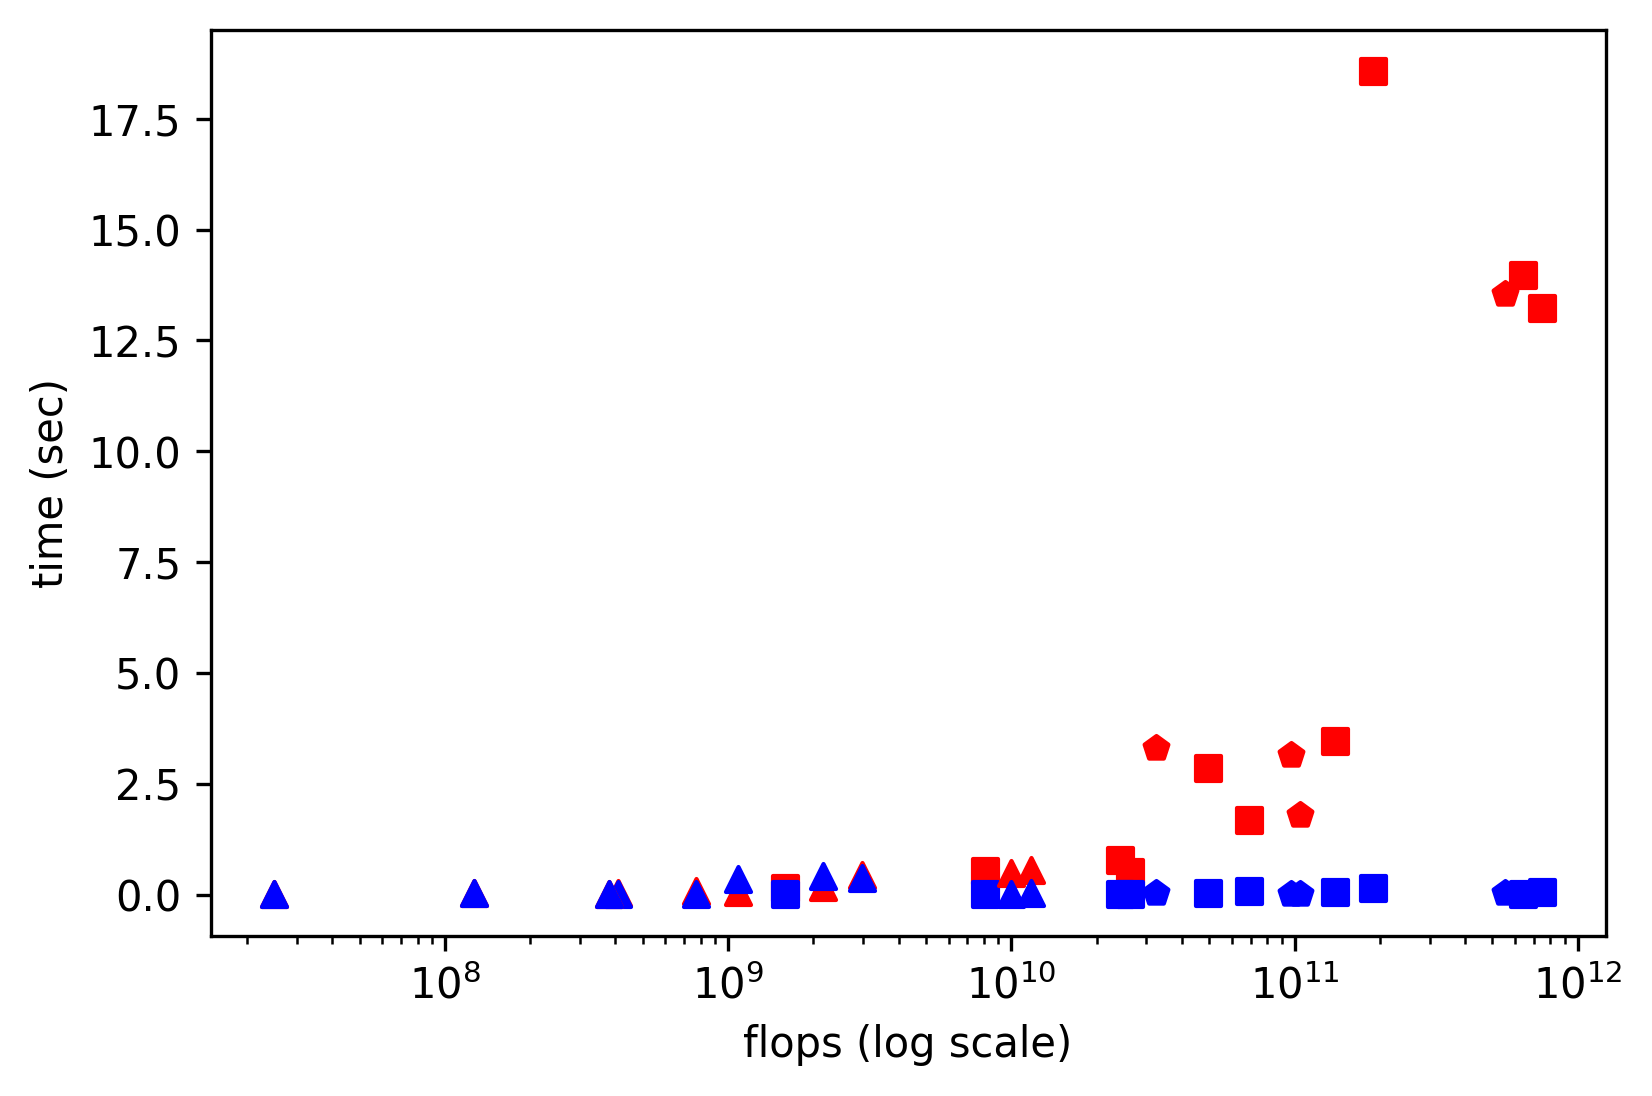

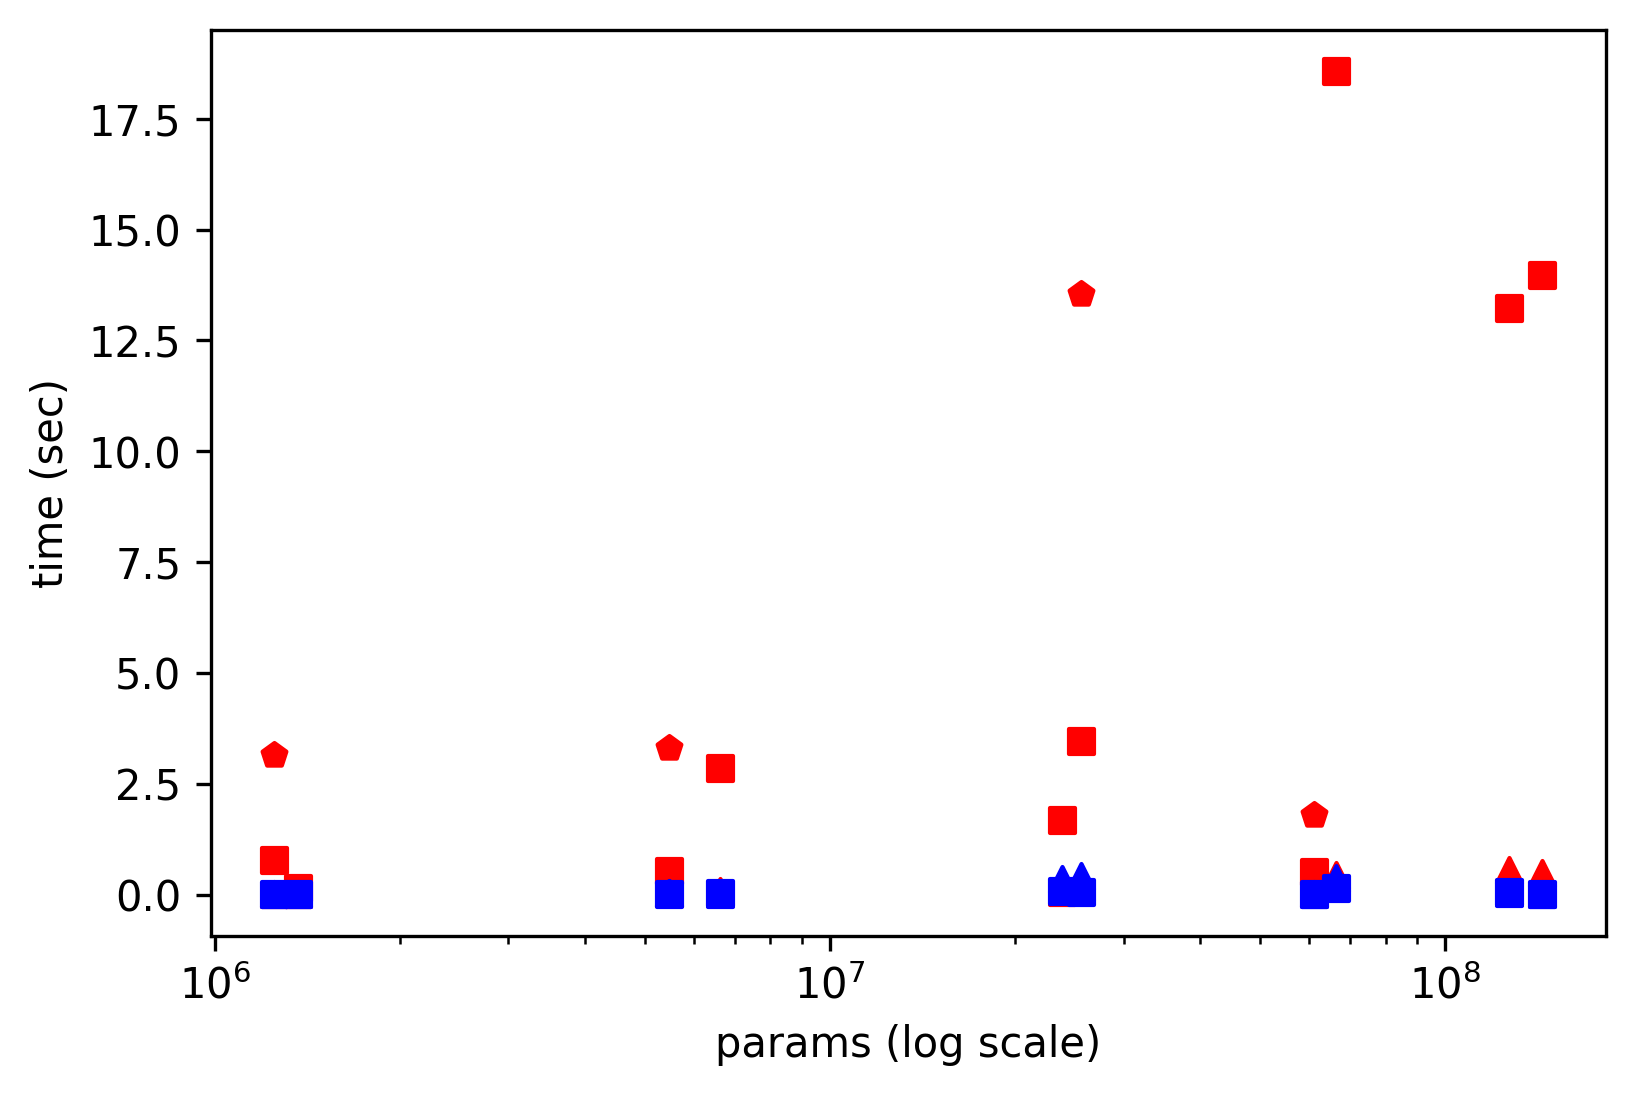

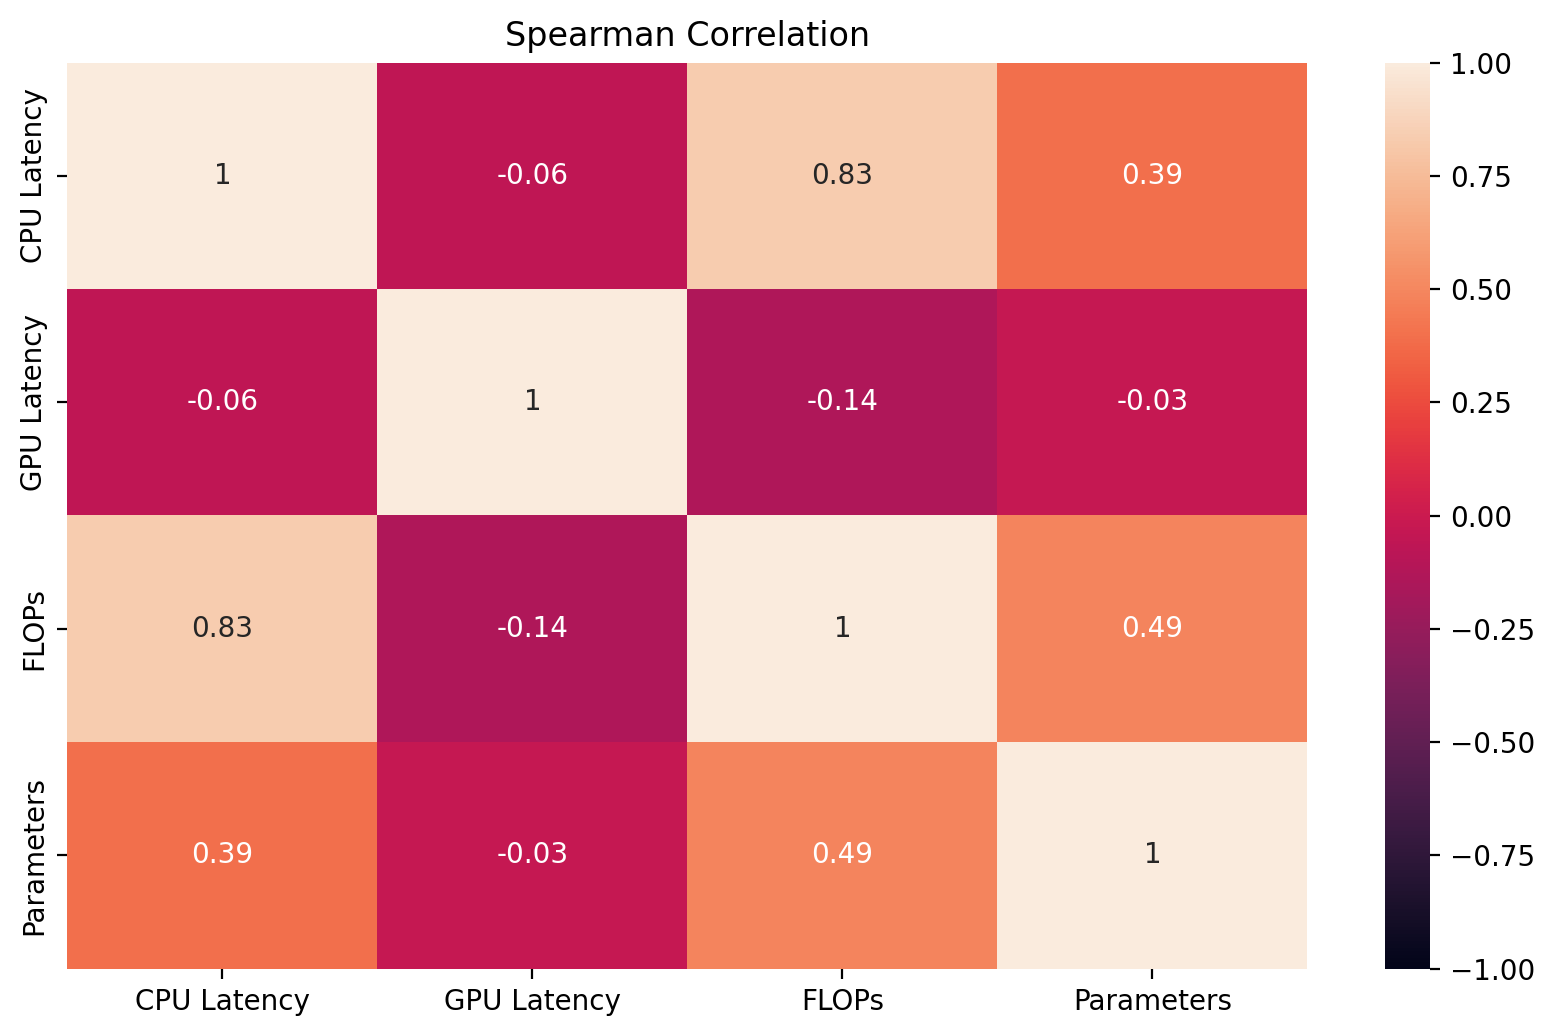

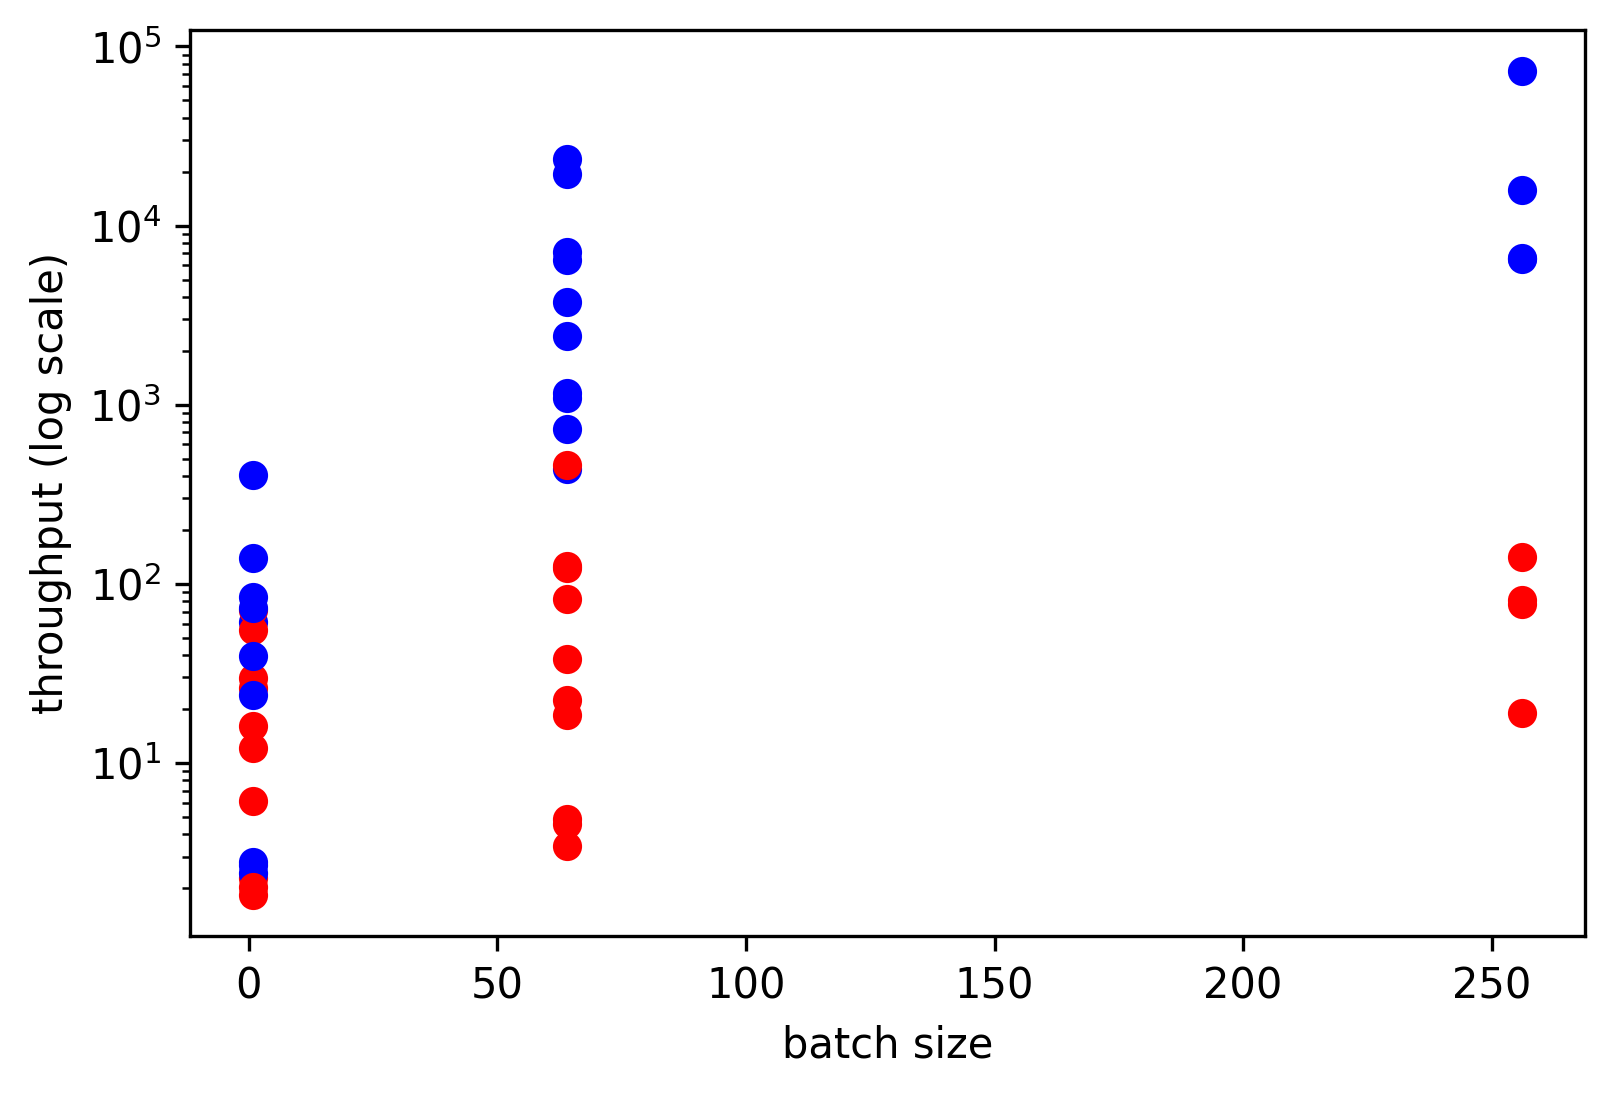

In [8]:
import pandas as pd
import seaborn as sns

legend_dict = {'color': {'cpu': 'r', 'gpu': 'b'}, 'shape': {1: '^', 64: 's', 256: 'p'}}
def performance_benchmarking_plots(input_dictionary, x_axis):
    plt.figure(dpi=300)
    for model in input_dictionary.keys():
        for device in ['cpu', 'gpu']:
            for key in input_dictionary[model][device].keys():
                if '_time' in key:
                    current_batch_size = int(key.split('_')[1])
                    y =  input_dictionary[model][device][key]
                    x =  input_dictionary[model][device]['batch_' + str(current_batch_size) + '_' + x_axis]
                    plt.scatter([x], [y], marker=legend_dict['shape'][current_batch_size], c=legend_dict['color'][device])
    #plt.yscale('log')
    plt.xscale('log')
    plt.xlabel(x_axis + ' (log scale)')
    plt.ylabel('time (sec)')
    plt.show()

def get_spearman(input_dictionary):
    df_dict = {'CPU Latency': [], 'GPU Latency': [], 'FLOPs': [], 'Parameters': []}
    for model in input_dictionary.keys():
        for key in input_dictionary[model]['cpu'].keys():
            if '_time' in key:
                df_dict['CPU Latency'].append(input_dictionary[model]['cpu'][key])
                df_dict['FLOPs'].append(input_dictionary[model]['cpu'][key[:-4] + 'flops'])
                df_dict['GPU Latency'].append(input_dictionary[model]['gpu'][key])
                df_dict['Parameters'].append(input_dictionary[model]['cpu'][key[:-4] + 'params'])
    df = pd.DataFrame.from_dict(df_dict)
    spearman = df.corr(method="spearman")
    plt.figure(figsize=(10,6), dpi=200)
    heatmap = sns.heatmap(df.corr(), vmin=-1, 
                      vmax=1, annot=True)
    plt.title("Spearman Correlation")
    plt.show()

def plot_throughput(input_dictionary):
    plt.figure(dpi=300)
    for model in input_dictionary.keys():
        for device in ['cpu', 'gpu']:
            for key in input_dictionary[model][device].keys():
                if '_time' in key:
                    current_batch_size = int(key.split('_')[1])
                    x = current_batch_size
                    y = current_batch_size / input_dictionary[model][device][key]
                    plt.scatter([x], [y], c=legend_dict['color'][device])
    plt.yscale('log')
    #plt.xscale('log')
    plt.xlabel('batch size')
    plt.ylabel('throughput (log scale)')
    plt.show()



performance_benchmarking_plots(dict2, 'flops')
performance_benchmarking_plots(dict2, 'params')

get_spearman(dict2)

plot_throughput(dict2)

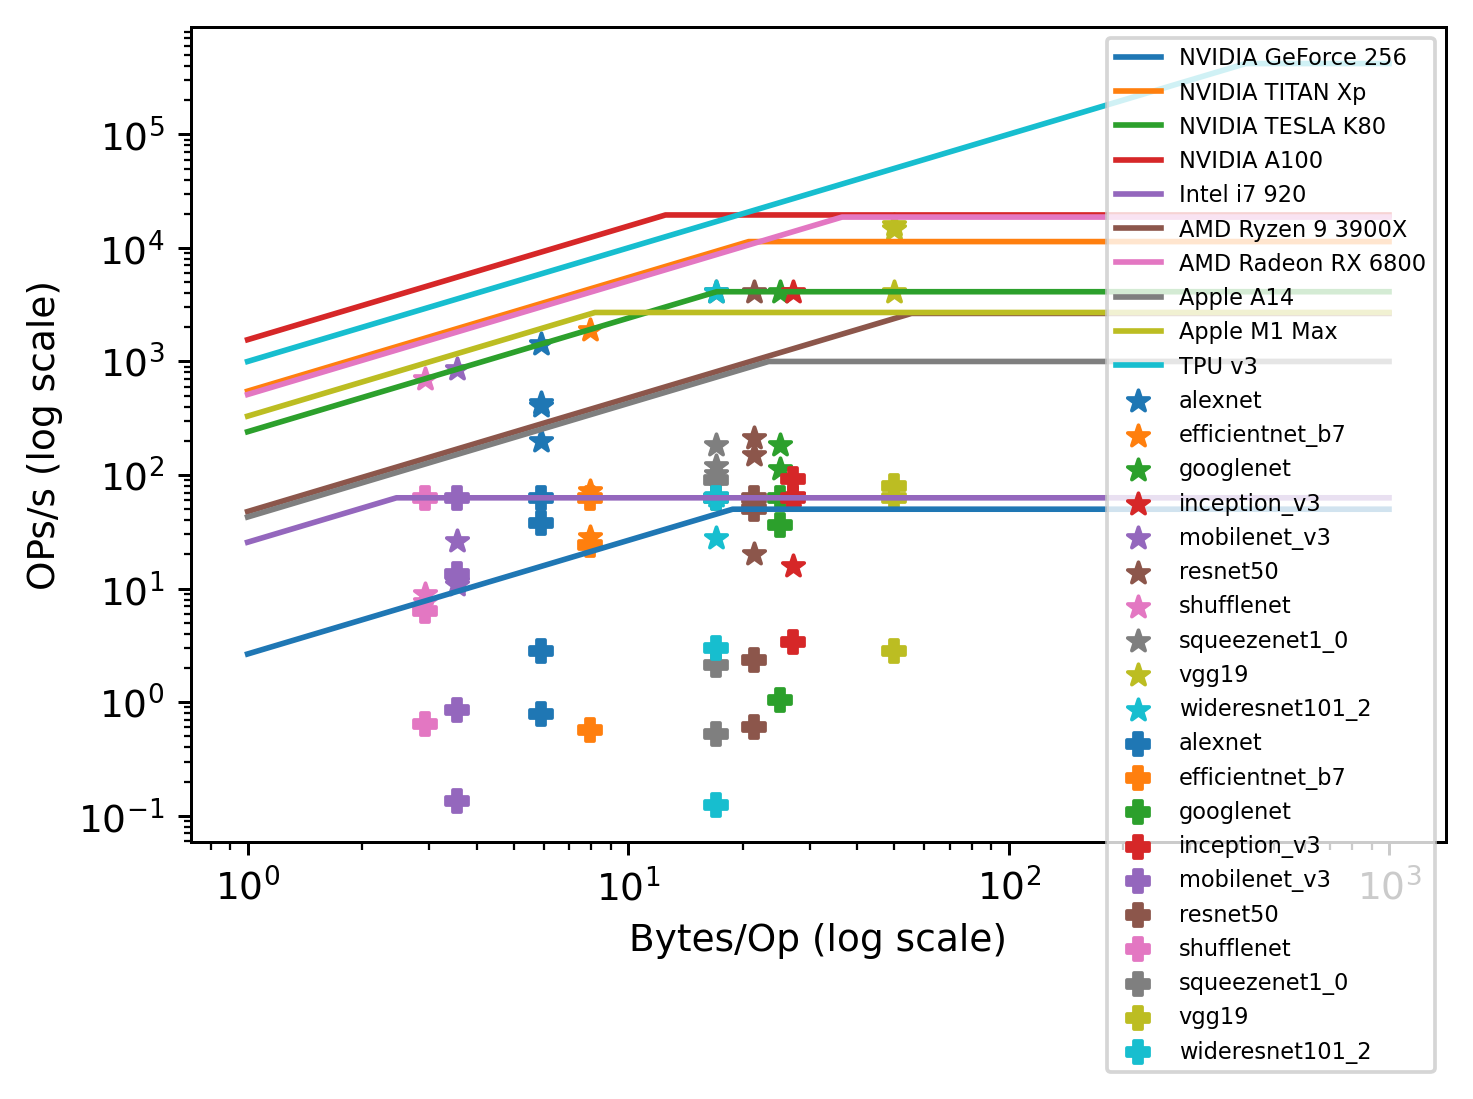

In [9]:
roofline(dict1, input2_dictionary=dict2, performance_dictionary=dict2)

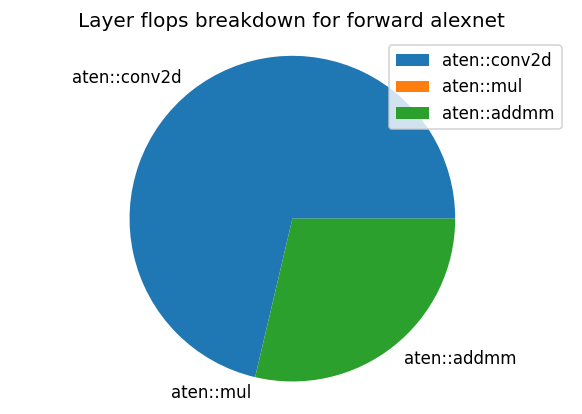

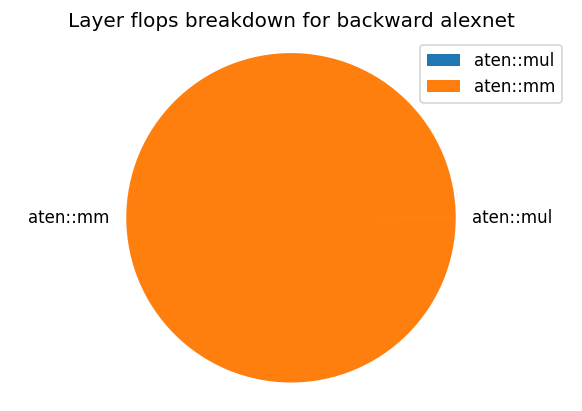

Forward:Backward ratios for latency and flops for alexnet 0.22122256088781245 1.743724687862097


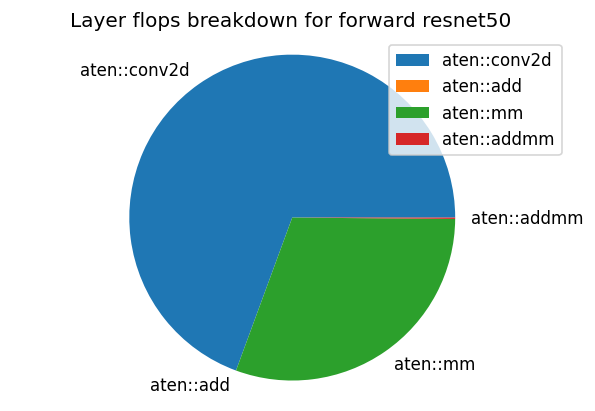

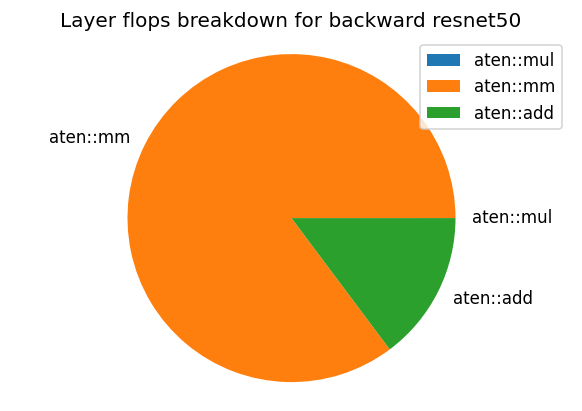

Forward:Backward ratios for latency and flops for resnet50 0.4861432510550768 322.54277922392424


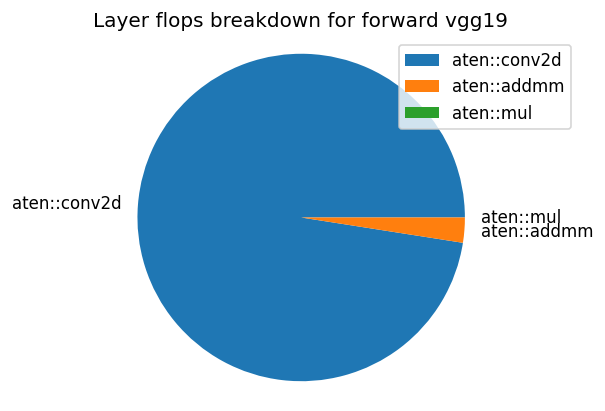

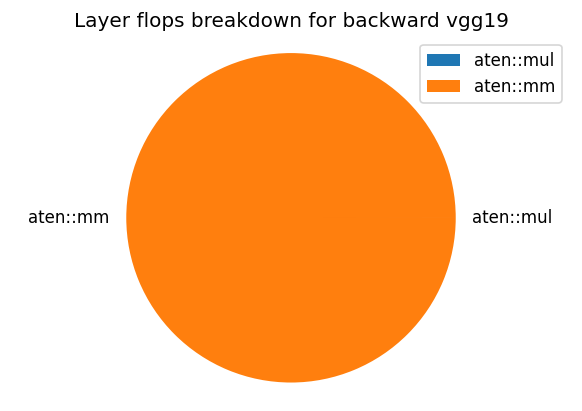

Forward:Backward ratios for latency and flops for vgg19 0.33247327342782507 20.22366663835236


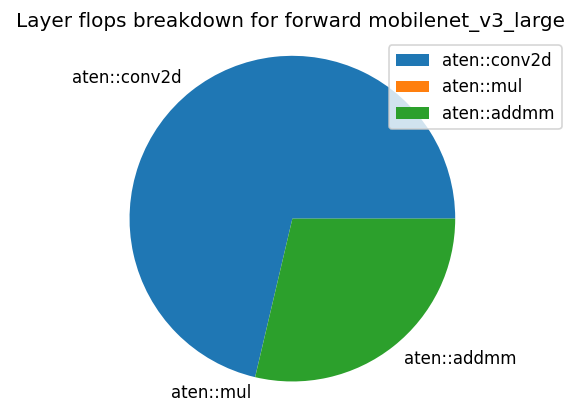

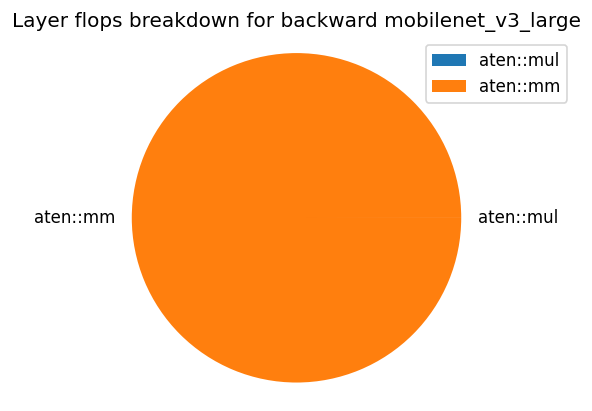

Forward:Backward ratios for latency and flops for mobilenet_v3_large 0.20047981761755748 1.743724687862097


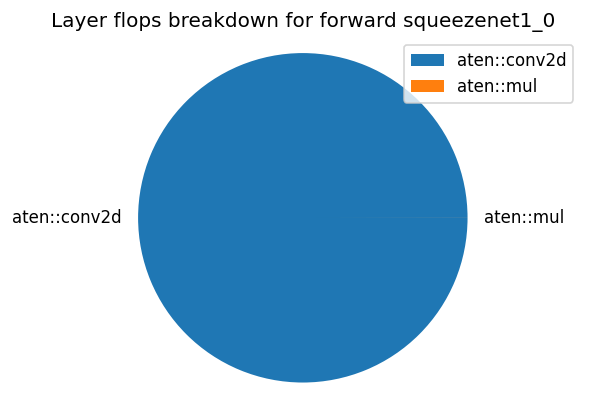

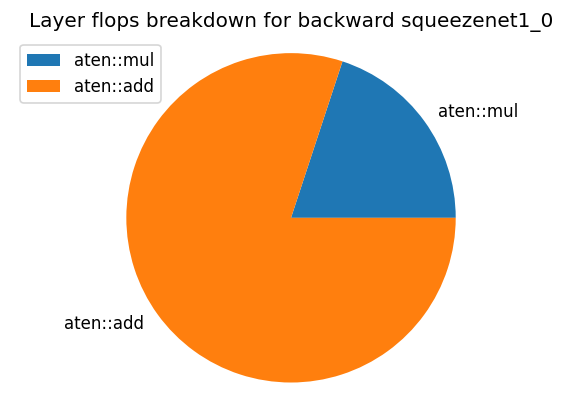

Forward:Backward ratios for latency and flops for squeezenet1_0 0.6388299217968036 3866.176504392086


In [43]:
from traitlets.traitlets import default
from torch.profiler import profile, record_function, ProfilerActivity
import time
from torchvision import models
from collections import defaultdict

def ratios(model_name, model):
    device = torch.device('cpu')
    model = model.to(device)
    batch_t = torch.rand(size=(1, 3, 112, 112)).to(device)
    sample =  torch.rand(size=(1,1000)).to(device)
    output = model(batch_t).to(device)
    loss = (sample - output).sum()
    with profile(activities=[ProfilerActivity.CPU], with_flops=True, record_shapes=True) as fprof:
        start = time.time()
        model(batch_t)
        end = time.time()

    flops = 0
    fwd = defaultdict(int)
    for event in fprof.events():
        if event.flops is not None and event.flops > 0:
            fwd[event.name] += event.flops
            flops += event.flops

    labels = []
    sizes = []
    for x, y in fwd.items():
        labels.append(x)
        sizes.append(y)
    plt.figure(dpi=120)
    plt.title('Layer flops breakdown for forward ' + model_name)
    plt.pie(sizes, labels=labels)
    plt.axis('equal')
    plt.legend()
    plt.show()
    
    with profile(activities=[ProfilerActivity.CPU], with_flops=True, record_shapes=True) as bprof:
        start2 = time.time()
        loss.backward()
        end2 = time.time()
    bflops = 0
    bck = defaultdict(int)
    for event in bprof.events():
        if event.flops is not None and event.flops > 0:
            bck[event.name] += event.flops
            bflops += event.flops

    labels = []
    sizes = []

    for x, y in bck.items():
        labels.append(x)
        sizes.append(y)

    plt.figure(dpi=120)
    plt.title('Layer flops breakdown for backward ' + model_name)
    plt.pie(sizes, labels=labels)
    plt.axis('equal')
    plt.legend()
    plt.show()

    print("Forward:Backward ratios for latency and flops for", model_name, (end - start) / (end2 - start2), flops / bflops)


for pair in [('alexnet', models.alexnet(pretrained=True)), ('resnet50', models.resnet50(pretrained=True)), ('vgg19', models.vgg19(pretrained=True)), ('mobilenet_v3_large', models.alexnet(pretrained=True)), ('squeezenet1_0', models.squeezenet1_0(pretrained=True))]:
    ratios(pair[0], pair[1])